In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame
raw_market_data_df = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
raw_market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
raw_market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
raw_market_data_df.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

# Fit the Standard Scaler with the training data
scaler.fit(raw_market_data_df)

StandardScaler()

In [6]:
# Create a DataFrame with the scaled data
scaled_market_data_df = scaler.transform(raw_market_data_df)

# Copy the crypto names from the original data
# Set the coinid column as index
scaled_market_data_df = pd.DataFrame(
    scaled_market_data_df, columns=raw_market_data_df.columns, index=raw_market_data_df.index
)

# Display sample data
scaled_market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


In [7]:
scaled_market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,0.000000,1.895503e-16,2.707861e-17,2.978647e-17,-5.415722e-18,-1.326852e-16,4.197185e-17
std,1.012423,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00
min,-4.981042,-1.682027e+00,-2.217108e+00,-1.393153e+00,-9.560487e-01,-5.511464e-01,-2.963296e-01
25%,-0.127467,-7.066688e-01,-6.299628e-01,-4.605580e-01,-5.517599e-01,-4.998478e-01,-2.817468e-01
50%,0.077497,-1.906843e-01,-9.190922e-03,-6.103015e-02,-1.592496e-01,-3.550537e-01,-2.255326e-01
75%,0.331280,4.931931e-01,6.435649e-01,1.165382e-01,1.606038e-02,-4.736110e-02,-1.454693e-01
max,1.919812,2.572251e+00,2.907054e+00,5.351455e+00,4.769913e+00,4.632380e+00,6.088625e+00


---

### Find the Best Value for k Using the Original Data.

In [8]:
# Create function to find the best value for k by displaying top 10 inertia values and plot the elbow curve
def elbow_plot(data_df, chart_type, start=1, end=11):
    # Create a list with the number of k-values from 1 to 11
    k_values = list(range(start, end))
    # Create an empty list to store the inertia values
    inertia = []

    # Create a for loop to compute the inertia with each possible value of k
    # Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    # 2. Fit the model to the data using `df_market_data_scaled`
    # 3. Append the model.inertia_ to the inertia list
    for k in k_values:
        k_model = KMeans(n_clusters=k, random_state=1)
        k_model.fit(data_df)
        inertia.append(k_model.inertia_)

    # Create a dictionary with the data to plot the Elbow curve
    kMeans_elbow_data = {"k": k_values, "inertia": inertia}
    kMeans_elbow_data_df = pd.DataFrame(kMeans_elbow_data)

    # Display the top 10 inertia values
    print(kMeans_elbow_data_df.head(10))

    # Plot a line chart with all the inertia values computed with 
    # the different values of k to visually identify the optimal value for k.
    plot = kMeans_elbow_data_df.hvplot.line(
        x="k",
        y="inertia",
        title=f"{chart_type} Elbow Curve",
        xticks=k,
        xlabel="Number of clusters",
        ylabel="Inertia",
        width=800,
        height=400,
    )
    
    return kMeans_elbow_data_df, plot



In [9]:
scaled_kMeans_elbow_df, scaled_plot = elbow_plot(scaled_market_data_df, 'Scaled')
scaled_plot

    k     inertia
0   1  287.000000
1   2  212.123342
2   3  165.136752
3   4   79.022435
4   5   66.413051
5   6   61.634088
6   7   46.074467
7   8   43.392694
8   9   32.913223
9  10   30.469111


:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Based on the Elbow Curve, the best value for k is 4. Also, 4 is the point where the inertia starts decreasing at a slower rate

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [10]:
# Initialize the K-Means model using the best value for k
scaled_k4_model = KMeans(n_clusters=4, random_state=1)

In [11]:
# Fit the K-Means model using the scaled data
scaled_k4_model.fit(scaled_market_data_df)

KMeans(n_clusters=4, random_state=1)

In [12]:
# Predict the clusters to group the cryptocurrencies using the scaled data
scaled_k_4 = scaled_k4_model.predict(scaled_market_data_df)

# Print the resulting array of cluster values.
scaled_k_4

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [13]:
# Create a copy of the DataFrame
clustered_market_data_df = raw_market_data_df.copy()
clustered_market_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [14]:
# Add a new column to the DataFrame with the predicted clusters
clustered_market_data_df["k4_clusters"] = scaled_k_4

# Display sample data
clustered_market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,k4_clusters
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195,2
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186,2
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756,2
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408,2


In [15]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
raw_scatter_plot = clustered_market_data_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="k4_clusters",
    hover_cols=["coin_name"],
    title="Cryptocurrency Clusters - Original Data",
    width=800,
    height=400,
)
raw_scatter_plot

:NdOverlay   [k4_clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis.

In [16]:
corrs = scaled_market_data_df.corr()
corrs

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
price_change_percentage_24h,1.000000,0.169659,0.279682,0.292563,0.136974,-0.541190,-0.750630
price_change_percentage_7d,0.169659,1.000000,0.538294,0.056899,-0.145099,-0.052533,-0.038424
price_change_percentage_14d,0.279682,0.538294,1.000000,0.658040,0.376108,-0.039086,-0.116632
price_change_percentage_30d,0.292563,0.056899,0.658040,1.000000,0.745248,0.324777,0.016078
price_change_percentage_60d,0.136974,-0.145099,0.376108,0.745248,1.000000,0.499102,0.211242
price_change_percentage_200d,-0.541190,-0.052533,-0.039086,0.324777,0.499102,1.000000,0.879873
price_change_percentage_1y,-0.750630,-0.038424,-0.116632,0.016078,0.211242,0.879873,1.000000


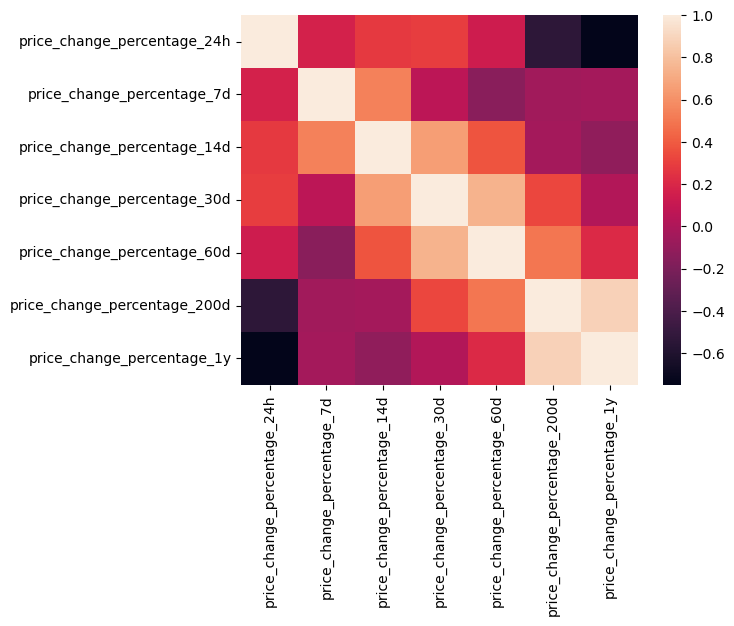

In [17]:
sns.heatmap(corrs)
plt.show()

In [18]:
# Create a PCA model instance and set `n_components=3`.
n_components = 3
pca = PCA(n_components=n_components)

In [19]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(scaled_market_data_df)
pca_df = pd.DataFrame(pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)])

# View the first five rows of the DataFrame. 
pca_df.head()

,PCA_1,PCA_2,PCA_3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


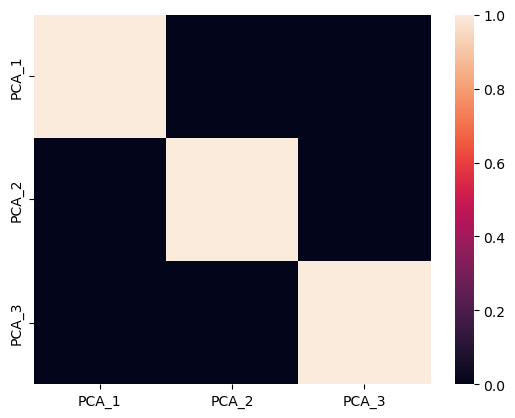

In [20]:
# sanity check
corrs = pca_df.corr()
sns.heatmap(corrs)
plt.show()

In [21]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance is 0.895. This means that these 3 components capture about 89.5% of the information present in the original data. 

In [22]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data
pca_market_data_df = pd.DataFrame(
    pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)], index=raw_market_data_df.index
)

# Copy the crypto names from the original data

# Set the coinid column as index
pca_market_data_df = pd.DataFrame(
    pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)], index=raw_market_data_df.index
)

# Display sample data
pca_market_data_df.head(10)

,PCA_1,PCA_2,PCA_3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the PCA Data

In [23]:
pca_elbow_df, pca_plot = elbow_plot(pca_market_data_df, 'PCA')
pca_plot

    k     inertia
0   1  256.874086
1   2  182.339530
2   3  135.442408
3   4   49.665497
4   5   38.672582
5   6   34.507577
6   7   23.728365
7   8   18.574523
8   9   15.572672
9  10   11.407667


:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best k value when using PCA data is 4. 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** The k value is consistent from the original data, where k is still 4. 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [24]:
# Initialize the K-Means model using the best value for k
pca_k4_model = KMeans(n_clusters=4, random_state=1)

In [25]:
# Fit the K-Means model using the PCA data
pca_k4_model.fit(pca_market_data_df)

KMeans(n_clusters=4, random_state=1)

In [26]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_k_4 = pca_k4_model.predict(pca_market_data_df)

# Print the resulting array of cluster values.
pca_k_4

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [27]:
# Create a copy of the DataFrame with the PCA data
clustered_pca_market_data_df = pca_market_data_df.copy()

# Add a new column to the DataFrame with the predicted clusters
clustered_pca_market_data_df["pca_k4_clusters"] = pca_k_4

# Display sample data
clustered_pca_market_data_df.head()

,PCA_1,PCA_2,PCA_3,pca_k4_clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [28]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
pca_scatter_plot = clustered_pca_market_data_df.hvplot.scatter(
    x="PCA_1",
    y="PCA_2",
    by="pca_k4_clusters",
    hover_cols=["coin_name"],
    title="Cryptocurrency Clusters - PCA",
    width=800,
    height=400,
)
pca_scatter_plot

:NdOverlay   [pca_k4_clusters]
   :Scatter   [PCA_1]   (PCA_2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [29]:
# Composite plot to contrast the Elbow curves
combined_plot = scaled_plot + pca_plot
combined_plot

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [30]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
raw_scatter_plot + pca_scatter_plot

:Layout
   .NdOverlay.I  :NdOverlay   [k4_clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)
   .NdOverlay.II :NdOverlay   [pca_k4_clusters]
      :Scatter   [PCA_1]   (PCA_2)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** With regards to the elbow curves, it shows that reducing the number of features did not affect the number of clusters; therefore, k remained as 4. 
  * With regards to the cluster plots, it demonstrated that having fewer features improve the clarity of clusters which makes it easier to interpret. This is potentially caused by the reduction of noise caused by the other features; however, it is important to NOT omit important features that could have influenced the clustering results. 